### Import and Define

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
resize = 1
plt.rcParams.update({
    "figure.figsize": (6.4*resize, 4.0*resize), # (6.4, 4.8)[4:3] -> (6.4, 4.0)[8:5]
    "font.sans-serif": ["Helvetica", "Nimbus Sans", "Arial", "DejaVu Sans"],
})

In [3]:
def restruct_array(content):
    # concatenate all np.ndarray to an array
    time = np.reshape((content.item()['push_time']-content.item()['start_time'])[1:, :], (1, -1))
    train_loss = np.reshape(content.item()['train_loss'][1:, :], (1, -1))
    train_acc = np.reshape(content.item()['train_acc'][1:, :], (1, -1))
    test_loss = np.reshape(content.item()['test_loss'][1:, :], (1, -1))
    test_acc = np.reshape(content.item()['test_acc'][1:, :], (1, -1))
    alles = np.concatenate((time, train_loss, train_acc, test_loss, test_acc))
    # sort the array by push time
    index = np.argsort(alles[0])
    alles = alles[:, index]
    # remove items unused
    index2 = alles[0, :] > 0
    alles = alles[:, index2]
    print(np.min(alles[3]), np.argmin(alles[3]))
    print(alles[3,-1], alles[4,-1])
    return alles

### Load Data

In [4]:
dir_path = '../ver_conf/scp/tf_npy'
base = '500'
extra = '1.1'
ls = [1, 2, 3]
small = [38, 87, 127]
with_w = []
with_sqrt_w = []
without_w = []

for num1, num2 in zip(ls, small):
    with_w.append(restruct_array(
        np.load(f'./{dir_path}/tf_extra{extra}_{num1}s_{num2}_{base}.npy', allow_pickle=True)
    ))
    with_sqrt_w.append(restruct_array(
        np.load(f'./{dir_path}/tf_sqrt_extra{extra}_{num1}s_{num2}_{base}.npy', allow_pickle=True)
    ))
    without_w.append(restruct_array(
        np.load(f'./{dir_path}/tf_nw_extra{extra}_{num1}s_{num2}_{base}.npy', allow_pickle=True)
    ))

1.172682285308838 344
1.1933256387710571 0.6847000122070312
1.1706196069717407 475
1.178795337677002 0.6783999800682068
1.1662402153015137 389
1.1866533756256104 0.6798999905586243
1.086773157119751 327
1.2502573728561401 0.7049999833106995
1.0787535905838013 271
1.2704048156738281 0.7091000080108643
1.1030296087265015 271
1.2952580451965332 0.7031000256538391
1.1490250825881958 202
1.3273112773895264 0.7070000171661377
1.1817551851272583 226
1.3837924003601074 0.704200029373169
1.187149167060852 208
1.410599946975708 0.697700023651123


In [5]:
def get_csv():
    loss = []
    acc = []
    loss.append(np.arange(1, 561)/4)
    acc.append(np.arange(1, 561)/4)
    for i, j, k in zip(with_w, with_sqrt_w, without_w):
        loss.append(i[3])
        loss.append(j[3])
        loss.append(k[3])
        acc.append(i[4])
        acc.append(j[4])
        acc.append(k[4])
    loss = np.array(loss).T
    acc = np.array(acc).T
    np.savetxt('loss_MUfactor.csv', loss, delimiter=',')
    np.savetxt('acc_MUfactor.csv', acc, delimiter=',')

#get_csv()

### Plot

In [6]:
with_label = []
with_sqrt_label = []
without_label = []

for num1, num2 in zip(ls, small):
    with_label.append(f'$n_S = {num1}, d_S / d_L$')
    with_sqrt_label.append((f'$n_S = {num1}$' + '$, \sqrt{d_S / d_L}$'))
    without_label.append(f'$n_S = {num1}, -$')

#zorder=len(label)-i

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_480907/3446278257.py:7: SyntaxWarning: invalid escape sequence '\s'
  with_sqrt_label.append((f'$n_S = {num1}$' + '$, \sqrt{d_S / d_L}$'))


In [7]:
#DPI = 300
SAVE = True
save_path = './figure'

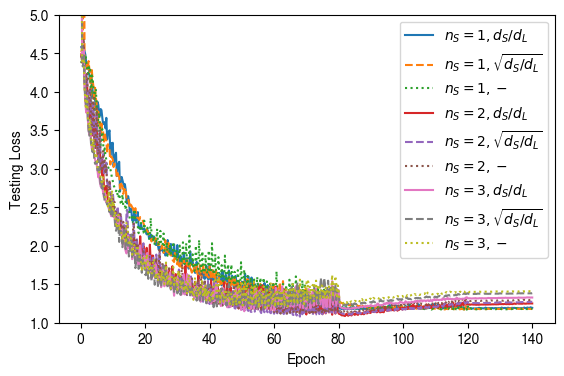

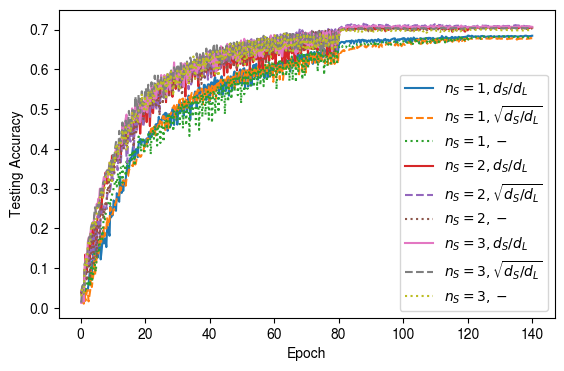

In [8]:
## testing loss
plt.figure()#(dpi=DPI)
for i in range(len(with_label)):
    plt.plot(np.arange(1, 561)/4, with_w[i][3], label=with_label[i])#, linewidth=1)
    plt.plot(np.arange(1, 561)/4, with_sqrt_w[i][3], '--', label=with_sqrt_label[i])#, linewidth=1)
    plt.plot(np.arange(1, 561)/4, without_w[i][3], ':', label=without_label[i])#, linewidth=1)
plt.ylim(1, 5)
#plt.title('Decaying Learning Rate, Testing Loss vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
if SAVE:
    plt.savefig(f"{save_path}/loss_MUfactor.pdf", bbox_inches="tight")
else:
    plt.show()

## testing accuracy
plt.figure()#(dpi=DPI)
for i in range(len(with_label)):
    plt.plot(np.arange(1, 561)/4, with_w[i][4], label=with_label[i])#, linewidth=1)
    plt.plot(np.arange(1, 561)/4, with_sqrt_w[i][4], '--', label=with_sqrt_label[i])#, linewidth=1)
    plt.plot(np.arange(1, 561)/4, without_w[i][4], ':', label=without_label[i])#, linewidth=1)
#plt.title('Decaying Learning Rate, Testing Accuracy vs. Time')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
if SAVE:
    plt.savefig(f"{save_path}/acc_MUfactor.pdf", bbox_inches="tight")
else:
    plt.show()